# Comparison of Debye decomposition in freqnecy and time domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import SIP
import pybert as pb

In [2]:
# define Cole-Cole model and t/f axis
synthCC = dict(rho=1, m=0.2, tau=0.3, c=0.5)

In [3]:
t = np.logspace(-2, 0.6, 30)
print(t)

[0.01       0.01229292 0.0151116  0.01857657 0.02283603 0.02807216
 0.03450889 0.04242152 0.05214845 0.06410569 0.07880463 0.09687393
 0.11908637 0.14639197 0.17995852 0.22122163 0.27194605 0.3343012
 0.4109539  0.50518247 0.62101694 0.76341136 0.93845574 1.15363644
 1.41815643 1.74332882 2.14306075 2.63444815 3.23850691 3.98107171]


In [4]:
f = np.logspace(-2, 2, 40)
print(f)

[1.00000000e-02 1.26638017e-02 1.60371874e-02 2.03091762e-02
 2.57191381e-02 3.25702066e-02 4.12462638e-02 5.22334507e-02
 6.61474064e-02 8.37677640e-02 1.06081836e-01 1.34339933e-01
 1.70125428e-01 2.15443469e-01 2.72833338e-01 3.45510729e-01
 4.37547938e-01 5.54102033e-01 7.01703829e-01 8.88623816e-01
 1.12533558e+00 1.42510267e+00 1.80472177e+00 2.28546386e+00
 2.89426612e+00 3.66524124e+00 4.64158883e+00 5.87801607e+00
 7.44380301e+00 9.42668455e+00 1.19377664e+01 1.51177507e+01
 1.91448198e+01 2.42446202e+01 3.07029063e+01 3.88815518e+01
 4.92388263e+01 6.23550734e+01 7.89652287e+01 1.00000000e+02]


In [5]:
decay = pb.Decay(t=t)
decay.v = decay.simulate(**synthCC)
# decay.show(xScale="log", yScale="log")

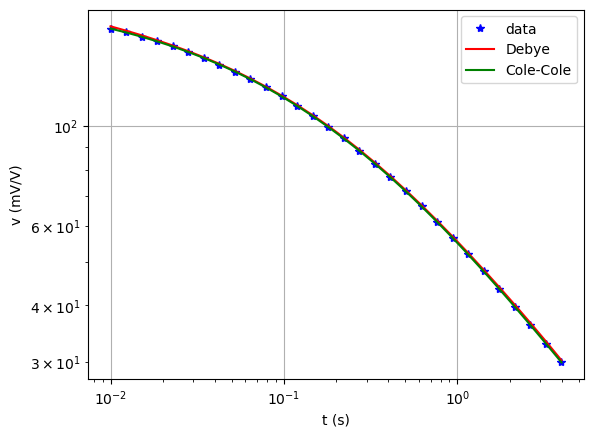

In [6]:
decay.invert()
taus = np.logspace(-3, +2, 50)
decay.decompose(error=0.01, tau=taus)
decay.showAll(xScale="log", yScale="log");



ARMS= 0.001496089185050529 RRMS= 0.8594793813669442


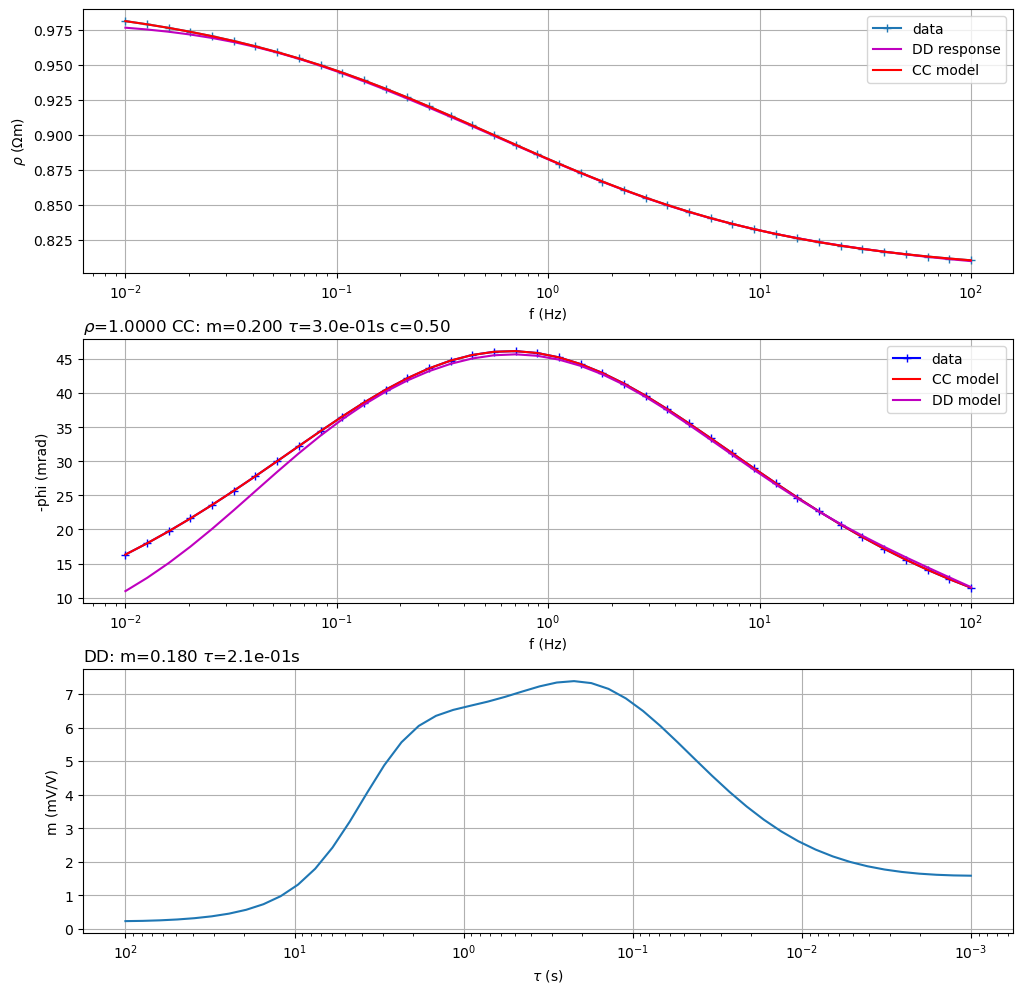

In [7]:
# Frequency domain
rhoC = SIP.modelColeColeRho(f, **synthCC)
spec = SIP.SIPSpectrum(f=f, amp=np.abs(rhoC), phi=-np.angle(rhoC))
spec.fitColeCole()
spec.fitDebyeModel(tau=taus)
spec.showAll();

## compare Debye models

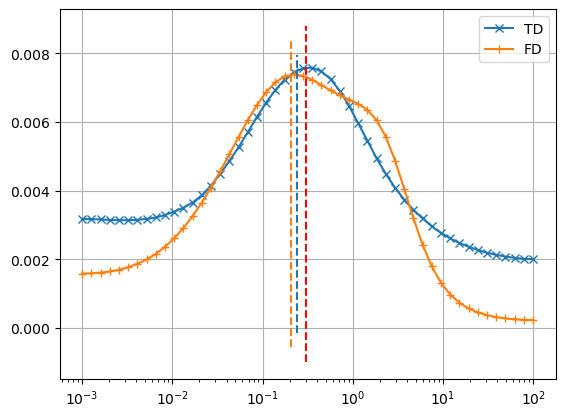

In [8]:
fig, ax = plt.subplots()
ax.semilogx(taus, decay.modelDD, "x-", label="TD")
ax.semilogx(taus, spec.mDD, "+-", label="FD")
ax.vlines(decay.logMeanTau(), *ax.get_ylim(), color="C0", ls="dashed")
ax.vlines(spec.logMeanTau(), *ax.get_ylim(), color="C1", ls="dashed")
ax.vlines(synthCC["tau"], *ax.get_ylim(), color="red", ls="dashed")
ax.grid()
ax.legend();

In [9]:
# output results
print("Cole-Cole  (synth TD FD)")
keys = list(synthCC.keys())
for i in range(-3, 0):
    key = keys[i]
    print(key, synthCC[key], decay.modelCC[i], spec.mCC[i])
    # print(synthCC)
print("Debye")
print("logMeanTau=", decay.logMeanTau(), spec.logMeanTau())

Cole-Cole  (synth TD FD)
m 0.2 0.19999999988913678 0.200000000001972
tau 0.3 0.3000000006270351 0.2999999999995957
c 0.5 0.5000000002522876 0.49999999999275024
Debye
logMeanTau= 0.2421257149184991 0.2089461229872989
